In [5]:
import geopandas as gpd
import fiona

# import the paris subway station data
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'
data = gpd.read_file('chapter_06_data/Paris_Metro_Stations.kml')
data


Name description timestamp begin end altitudeMode  tessellate  \
0  Station 1        None       NaT   NaT NaT         None          -1   
1  Station 2        None       NaT   NaT NaT         None          -1   
2  Station 3        None       NaT   NaT NaT         None          -1   
3  Station 4        None       NaT   NaT NaT         None          -1   
4  Station 5        None       NaT   NaT NaT         None          -1   
5  Station 6        None       NaT   NaT NaT         None          -1   
6  Station 7        None       NaT   NaT NaT         None          -1   
7  Station 8        None       NaT   NaT NaT         None          -1   

   extrude  visibility drawOrder  icon                            geometry  
0        0          -1      None  None  POINT Z (2.37447 48.84432 0.00000)  
1        0          -1      None  None  POINT Z (2.39695 48.84886 0.00000)  
2        0          -1      None  None  POINT Z (2.43332 48.84737 0.00000)  
3        0          -1      None  None  POINT Z (2.48693 48.85342 0.00000)  
4        0          -1      None  None  POINT Z (2.34674 48.86190 0.00000)  
5        0          -1      None  None  POINT Z (2.32936 48.87226 0.00000)  
6        0          -1      None  None  POINT Z (2.29493 48.87381 0.00000)  
7        0          -1      None  None  POINT Z (2.23821 48.89170 0.00000)

<AxesSubplot:>

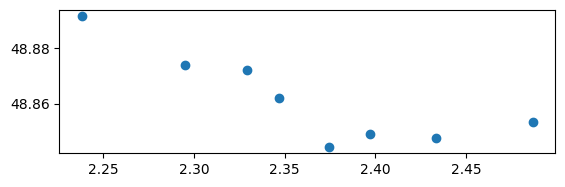

In [3]:
data.plot()

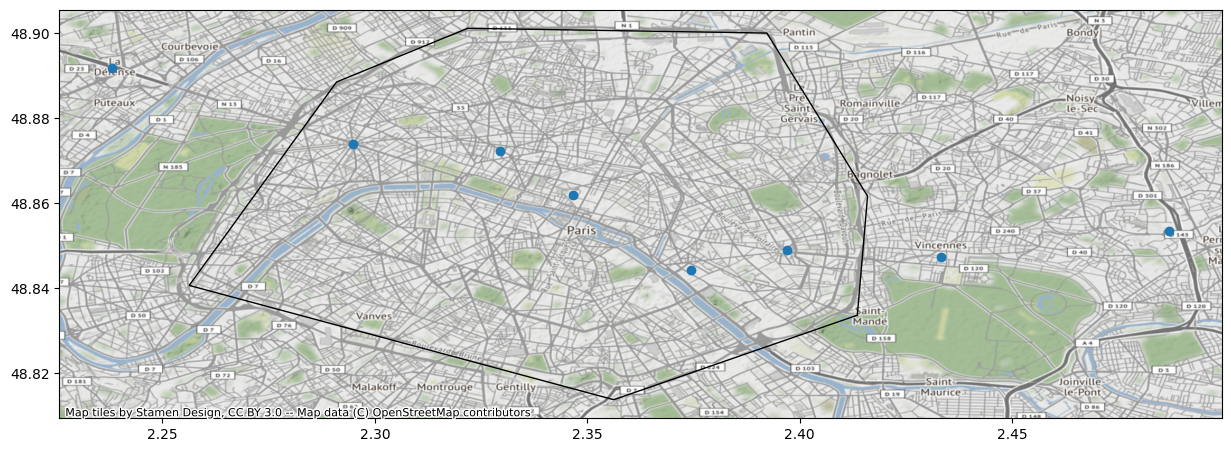

In [8]:
import contextily as cx

# import the paris subway station data
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'
paris = gpd.read_file('chapter_05_data/ParisSeineData.kml')
paris = paris.loc[1:,:]

# use paris data to set extent but leave invisible
ax = paris.plot(figsize=(15,15), color="None")

# add the data
data.plot(ax=ax)

# add the background map
cx.add_basemap(ax, crs=data.crs)


In [9]:
data.buffer(0.01)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12244\1192652553.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data.buffer(0.01)


0    POLYGON ((2.38447 48.84432, 2.38442 48.84334, ...
1    POLYGON ((2.40695 48.84886, 2.40690 48.84788, ...
2    POLYGON ((2.44332 48.84737, 2.44327 48.84639, ...
3    POLYGON ((2.49693 48.85342, 2.49688 48.85244, ...
4    POLYGON ((2.35674 48.86190, 2.35669 48.86092, ...
5    POLYGON ((2.33936 48.87226, 2.33931 48.87128, ...
6    POLYGON ((2.30493 48.87381, 2.30488 48.87283, ...
7    POLYGON ((2.24821 48.89170, 2.24816 48.89072, ...
dtype: geometry

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12244\963071109.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data.buffer(0.01).plot(ax=ax, edgecolor='black', color='None')


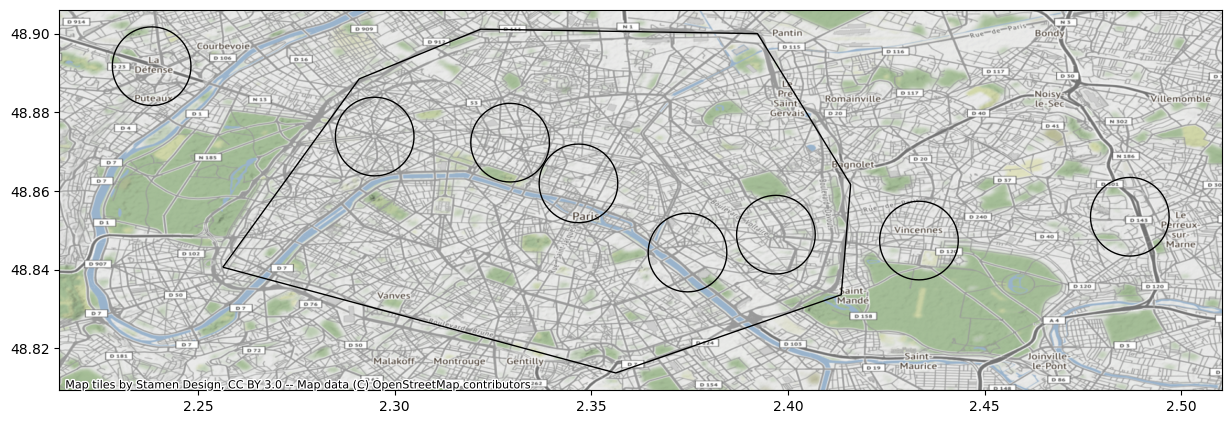

In [10]:
import contextily as cx

# import the paris subway station data
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'
paris = gpd.read_file('chapter_05_data/ParisSeineData.kml')
paris = paris.loc[1:,:]

# use paris data to set extent but leave invisible
ax = paris.plot(figsize=(15,15), color="None")

# add the data
data.buffer(0.01).plot(ax=ax, edgecolor='black', color='None')

# add the background map
cx.add_basemap(ax, crs=data.crs)


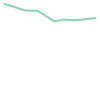

In [12]:
from shapely.geometry.linestring import LineString

LineString(data.loc[[7,6,5,4,0,1,2,3], 'geometry'].reset_index(drop=True))

In [13]:
import pandas as pd

df = pd.DataFrame(
    {
     'Name': ['metro'],
     'geometry': [LineString(data.loc[[7,6,5,4,0,1,2,3], 'geometry'].reset_index(drop=True))]
    }
)

gdf = gpd.GeoDataFrame(df)

gdf


c:\Users\Administrator\PycharmProjects\env_py310\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


Name                                           geometry
0  metro  LINESTRING Z (2.23821 48.89170 0.00000, 2.2949...

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12244\3394722522.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data.buffer(0.01).plot(ax=ax, edgecolor='black', color='None')


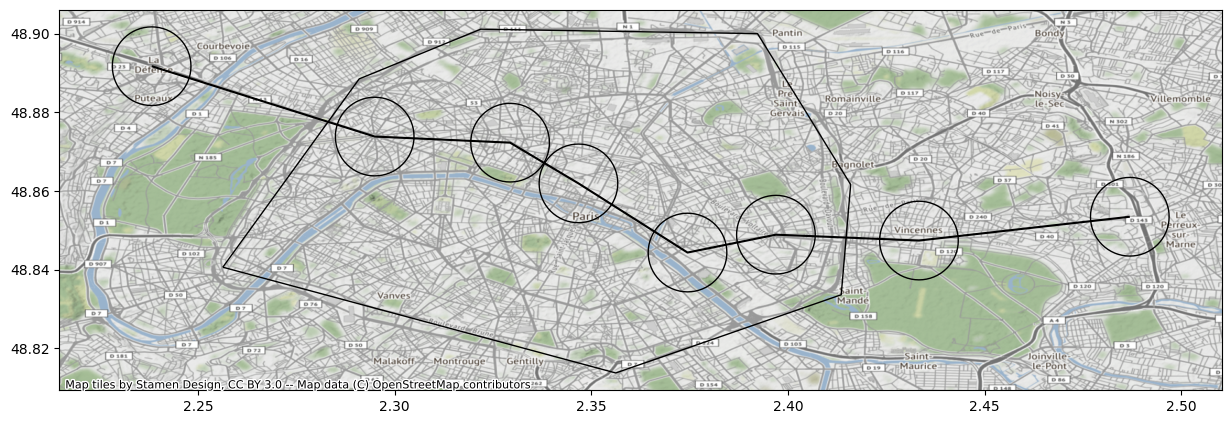

In [14]:
import contextily as cx

# use paris data to set extent but leave invisible
ax = paris.plot(figsize=(15,15), color="None")

# add the point data
data.buffer(0.01).plot(ax=ax, edgecolor='black', color='None')

# add the line data
gdf.plot(ax = ax, color = 'black')

# add the background map
cx.add_basemap(ax, crs=data.crs)


In [15]:
gdf.buffer(0.001)

0    POLYGON ((2.29510 48.87480, 2.32941 48.87326, ...
dtype: geometry

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12244\3365848805.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data.buffer(0.01).plot(ax=ax, edgecolor='black', color='green', alpha=0.5)


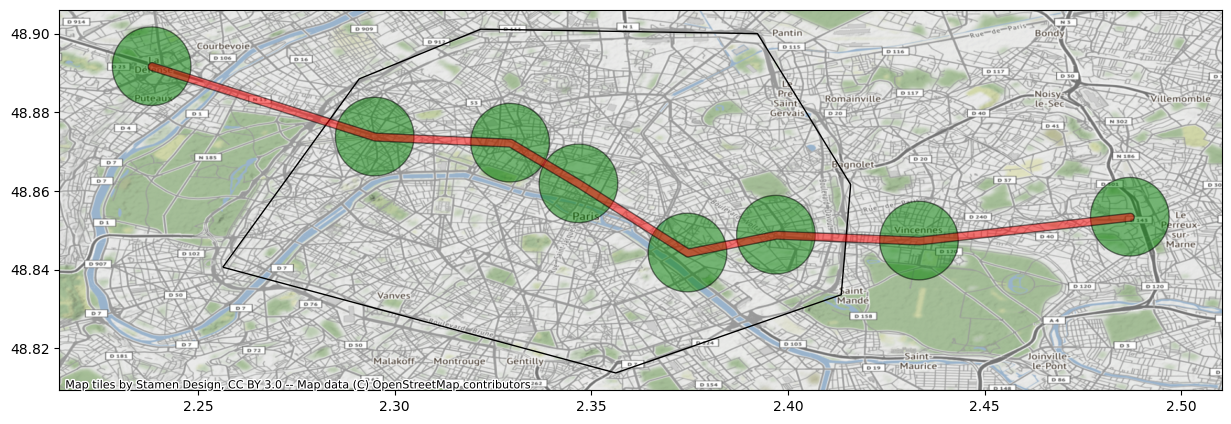

In [16]:
import contextily as cx

# use paris data to set extent but leave invisible
ax = paris.plot(figsize=(15,15), color="None")

# add the point data
data.buffer(0.01).plot(ax=ax, edgecolor='black', color='green', alpha=0.5)

# add the line data
gdf.buffer(0.001).plot(ax = ax, edgecolor='black', color = 'red', alpha = 0.5)

# add the background map
cx.add_basemap(ax, crs=data.crs)


In [17]:
# import the paris parks data
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'
parks = gpd.read_file('chapter_06_data\Paris_Parks.kml')
parks


Name description timestamp begin end altitudeMode  tessellate  extrude  \
0    Park 1        None       NaT   NaT NaT         None          -1        0   
1    Park 2        None       NaT   NaT NaT         None          -1        0   
2    Park 3        None       NaT   NaT NaT         None          -1        0   
3    Park 4        None       NaT   NaT NaT         None          -1        0   
4    Park 5        None       NaT   NaT NaT         None          -1        0   
5    Park 6        None       NaT   NaT NaT         None          -1        0   
6    Park 7        None       NaT   NaT NaT         None          -1        0   
7    Park 8        None       NaT   NaT NaT         None          -1        0   
8    Park 9        None       NaT   NaT NaT         None          -1        0   
9   Park 10        None       NaT   NaT NaT         None          -1        0   
10  Park 11        None       NaT   NaT NaT         None          -1        0   
11  Park 12        None       NaT   NaT NaT         None          -1        0   
12  Park 13        None       NaT   NaT NaT         None          -1        0   
13  Park 14        None       NaT   NaT NaT         None          -1        0   
14  Park 15        None       NaT   NaT NaT         None          -1        0   
15  Park 16        None       NaT   NaT NaT         None          -1        0   
16  Park 17        None       NaT   NaT NaT         None          -1        0   
17  Park 18        None       NaT   NaT NaT         None          -1        0   

    visibility drawOrder  icon  \
0           -1      None  None   
1           -1      None  None   
2           -1      None  None   
3           -1      None  None   
4           -1      None  None   
5           -1      None  None   
6           -1      None  None   
7           -1      None  None   
8           -1      None  None   
9           -1      None  None   
10          -1      None  None   
11          -1      None  None   
12          -1      None  None   
13          -1      None  None   
14          -1      None  None   
15          -1      None  None   
16          -1      None  None   
17          -1      None  None   

                                             geometry  
0   POLYGON Z ((2.23251 48.86778 0.00000, 2.22882 ...  
1   POLYGON Z ((2.28578 48.86047 0.00000, 2.28754 ...  
2   POLYGON Z ((2.28848 48.85499 0.00000, 2.29230 ...  
3   POLYGON Z ((2.31160 48.86270 0.00000, 2.31118 ...  
4   POLYGON Z ((2.31043 48.86911 0.00000, 2.31015 ...  
5   POLYGON Z ((2.32140 48.86372 0.00000, 2.32994 ...  
6   POLYGON Z ((2.33771 48.86622 0.00000, 2.33650 ...  
7   POLYGON Z ((2.30552 48.87962 0.00000, 2.30653 ...  
8   POLYGON Z ((2.35484 48.84382 0.00000, 2.35595 ...  
9   POLYGON Z ((2.37595 48.83865 0.00000, 2.38428 ...  
10  POLYGON Z ((2.38680 48.84394 0.00000, 2.38797 ...  
11  POLYGON Z ((2.38598 48.84260 0.00000, 2.38652 ...  
12  POLYGON Z ((2.39631 48.84879 0.00000, 2.39573 ...  
13  POLYGON Z ((2.39779 48.83172 0.00000, 2.39642 ...  
14  POLYGON Z ((2.46557 48.85144 0.00000, 2.47111 ...  
15  POLYGON Z ((2.46759 48.86429 0.00000, 2.47261 ...  
16  POLYGON Z ((2.47823 48.84859 0.00000, 2.47857 ...  
17  POLYGON Z ((2.45078 48.85457 0.00000, 2.45756 ...

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12244\2341096158.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data.buffer(0.01).plot(ax=ax, edgecolor='black', color='green', alpha=0.5)


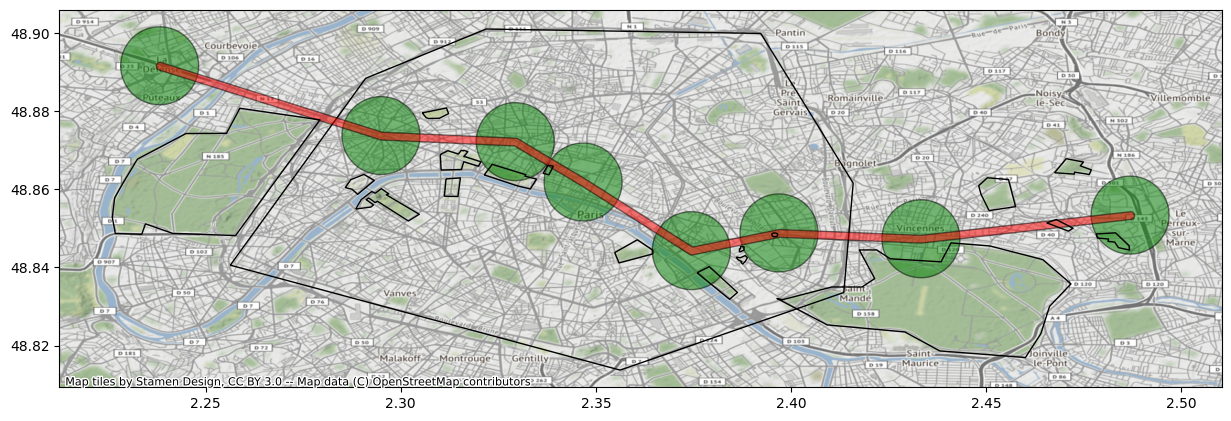

In [18]:
import contextily as cx

# use paris data to set extent but leave invisible
ax = paris.plot(figsize=(15,15), color="None")

# add the point data
data.buffer(0.01).plot(ax=ax, edgecolor='black', color='green', alpha=0.5)

# add the line data
gdf.buffer(0.001).plot(ax = ax, edgecolor='black', color = 'red', alpha = 0.5)

# add the parks
parks.plot(ax=ax, edgecolor='black', color="none")

# add the background map
cx.add_basemap(ax, crs=data.crs)


In [19]:
parks.buffer(0.01)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12244\2763166177.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parks.buffer(0.01)


0     POLYGON ((2.22785 48.87663, 2.24030 48.88317, ...
1     POLYGON ((2.27757 48.86618, 2.27899 48.86822, ...
2     POLYGON ((2.27980 48.85996, 2.28117 48.86236, ...
3     POLYGON ((2.31092 48.87267, 2.31461 48.87293, ...
4     POLYGON ((2.30602 48.87809, 2.30767 48.87890, ...
5     POLYGON ((2.31340 48.86973, 2.31544 48.87244, ...
6     POLYGON ((2.33971 48.87602, 2.34109 48.87574, ...
7     POLYGON ((2.30353 48.88942, 2.30973 48.89068, ...
8     POLYGON ((2.34991 48.85252, 2.35571 48.85580, ...
9     POLYGON ((2.37151 48.84761, 2.37464 48.84917, ...
10    POLYGON ((2.37680 48.84407, 2.37681 48.84490, ...
11    POLYGON ((2.38020 48.83420, 2.38001 48.83434, ...
12    POLYGON ((2.40277 48.85642, 2.40307 48.85617, ...
13    POLYGON ((2.39755 48.84199, 2.40753 48.84457, ...
14    POLYGON ((2.46230 48.86089, 2.46474 48.86174, ...
15    POLYGON ((2.45988 48.87066, 2.46284 48.87424, ...
16    POLYGON ((2.47697 48.83768, 2.47672 48.83772, ...
17    POLYGON ((2.44181 48.85015, 2.43975 48.854

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12244\3580097902.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data.buffer(0.01).plot(ax=ax, edgecolor='none', color='yellow', alpha=0.5, zorder=2)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12244\3580097902.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parks.buffer(0.01).plot(ax=ax, edgecolor='none', color="green", alpha = 0.5)


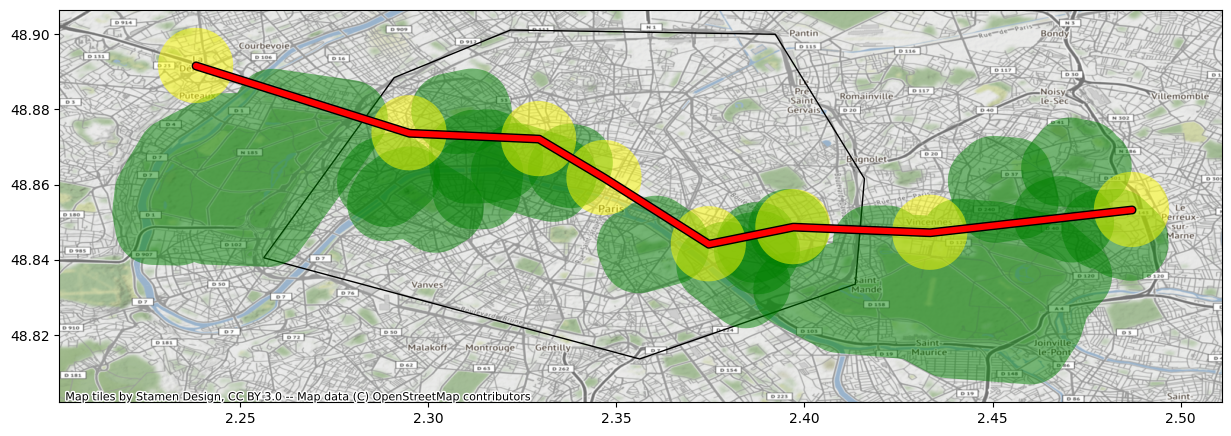

In [20]:
import contextily as cx

# use paris data to set extent but leave invisible
ax = paris.plot(figsize=(15,15), color="None")

# add the point data
data.buffer(0.01).plot(ax=ax, edgecolor='none', color='yellow', alpha=0.5, zorder=2)

# add the line data
gdf.buffer(0.001).plot(ax = ax, edgecolor='black', color = 'red', alpha = 1, zorder=3)

# add the parks
parks.buffer(0.01).plot(ax=ax, edgecolor='none', color="green", alpha = 0.5)

# add the background map
cx.add_basemap(ax, crs=data.crs)


In [21]:
station_buffer = data.buffer(0.01)
rails_buffer = gdf.buffer(0.001)
park_buffer = parks.buffer(0.01)

A = gpd.GeoDataFrame({'geometry': station_buffer})
B = gpd.GeoDataFrame({'geometry': park_buffer})
C = gpd.GeoDataFrame({'geometry': rails_buffer})


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12244\3733166113.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  station_buffer = data.buffer(0.01)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12244\3733166113.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  park_buffer = parks.buffer(0.01)


In [22]:
A_and_B = A.overlay(B, how='intersection')
A_and_B


geometry
0   POLYGON ((2.36976 48.83550, 2.36892 48.83600, ...
1   POLYGON ((2.35308 48.85417, 2.35229 48.85359, ...
2   POLYGON ((2.38442 48.84334, 2.38428 48.84236, ...
3   POLYGON ((2.39404 48.83929, 2.39312 48.83962, ...
4   POLYGON ((2.38442 48.84334, 2.38428 48.84236, ...
5   POLYGON ((2.39597 48.83891, 2.39500 48.83905, ...
6   POLYGON ((2.38442 48.84334, 2.38428 48.84236, ...
7   POLYGON ((2.39793 48.83891, 2.39695 48.83886, ...
8   POLYGON ((2.40526 48.84330, 2.40468 48.84252, ...
9   POLYGON ((2.40526 48.84330, 2.40468 48.84252, ...
10  POLYGON ((2.44327 48.84639, 2.44313 48.84542, ...
11  POLYGON ((2.43966 48.85510, 2.44039 48.85444, ...
12  POLYGON ((2.48059 48.84569, 2.47986 48.84635, ...
13  POLYGON ((2.47698 48.85440, 2.47712 48.85537, ...
14  POLYGON ((2.49575 48.84870, 2.49525 48.84786, ...
15  POLYGON ((2.34039 48.85417, 2.33967 48.85483, ...
16  POLYGON ((2.33931 48.87128, 2.33917 48.87031, ...
17  POLYGON ((2.34039 48.85417, 2.33967 48.85483, ...
18  POLYGON ((2.33931 48.87128, 2.33917 48.87031, ...
19  POLYGON ((2.32465 48.86344, 2.32380 48.86394, ...
20  POLYGON ((2.32838 48.86231, 2.32741 48.86245, ...
21  POLYGON ((2.30488 48.87283, 2.30474 48.87186, ...
22  POLYGON ((2.31941 48.87324, 2.31955 48.87421, ...
23  POLYGON ((2.30488 48.87283, 2.30474 48.87186, ...
24  POLYGON ((2.28569 48.86998, 2.28536 48.87091, ...
25  POLYGON ((2.24455 48.88397, 2.24377 48.88338, ...
26  POLYGON ((2.30200 48.86674, 2.30127 48.86608, ...
27  POLYGON ((2.30200 48.86674, 2.30127 48.86608, ...

In [23]:
A_and_B_not_C = A_and_B.overlay(C, how='difference')
A_and_B_not_C


c:\Users\Administrator\PycharmProjects\env_py310\lib\site-packages\geopandas\geodataframe.py:2352: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  return geopandas.overlay(


geometry
0   MULTIPOLYGON (((2.36892 48.83600, 2.36813 48.8...
1   POLYGON ((2.35308 48.85417, 2.35229 48.85359, ...
2   MULTIPOLYGON (((2.38428 48.84236, 2.38404 48.8...
3   POLYGON ((2.39312 48.83962, 2.39223 48.84004, ...
4   MULTIPOLYGON (((2.38428 48.84236, 2.38404 48.8...
5   MULTIPOLYGON (((2.39500 48.83905, 2.39404 48.8...
6   MULTIPOLYGON (((2.38428 48.84236, 2.38404 48.8...
7   MULTIPOLYGON (((2.39695 48.83886, 2.39597 48.8...
8   MULTIPOLYGON (((2.40468 48.84252, 2.40402 48.8...
9   POLYGON ((2.40526 48.84330, 2.40468 48.84252, ...
10  MULTIPOLYGON (((2.44313 48.84542, 2.44289 48.8...
11  POLYGON ((2.44039 48.85444, 2.44105 48.85371, ...
12  MULTIPOLYGON (((2.47986 48.84635, 2.47920 48.8...
13  POLYGON ((2.47698 48.85440, 2.47712 48.85537, ...
14  POLYGON ((2.49525 48.84786, 2.49466 48.84707, ...
15  MULTIPOLYGON (((2.33967 48.85483, 2.33901 48.8...
16  MULTIPOLYGON (((2.33917 48.87031, 2.33893 48.8...
17  MULTIPOLYGON (((2.33901 48.86825, 2.33967 48.8...
18  MULTIPOLYGON (((2.33917 48.87031, 2.33893 48.8...
19  POLYGON ((2.32380 48.86394, 2.32302 48.86453, ...
20  MULTIPOLYGON (((2.32741 48.86245, 2.32646 48.8...
21  MULTIPOLYGON (((2.30221 48.87490, 2.30287 48.8...
22  POLYGON ((2.31955 48.87421, 2.31979 48.87516, ...
23  MULTIPOLYGON (((2.29668 48.87494, 2.29626 48.8...
24  MULTIPOLYGON (((2.28611 48.87852, 2.28661 48.8...
25  POLYGON ((2.24455 48.88397, 2.24377 48.88338, ...
26  POLYGON ((2.30127 48.86608, 2.30048 48.86549, ...
27  POLYGON ((2.30200 48.86674, 2.30127 48.86608, ...

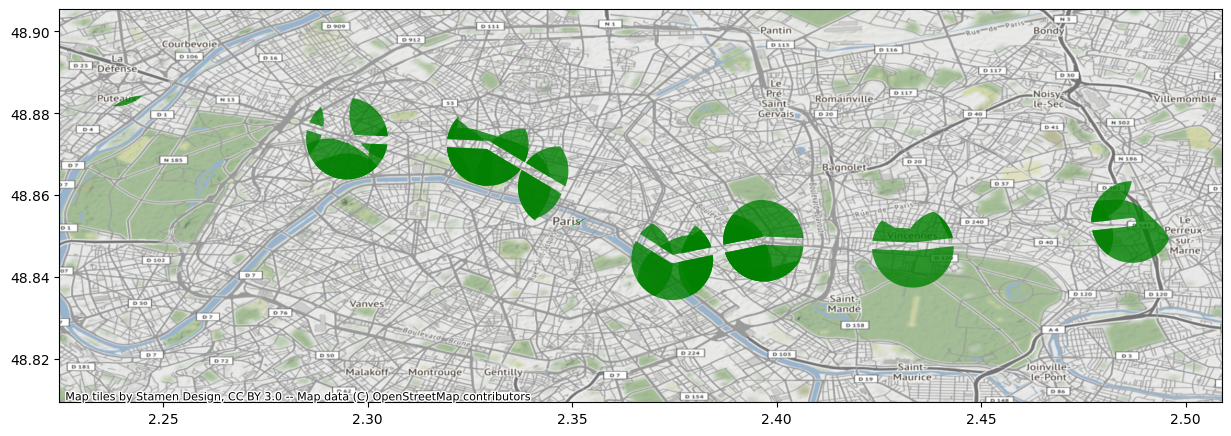

In [24]:
import contextily as cx

# use paris data to set extent but leave invisible
ax = paris.plot(figsize=(15,15), edgecolor="none", color="none")

A_and_B_not_C.plot(ax=ax, edgecolor='none', color='green', alpha=0.8)

# add the background map
cx.add_basemap(ax, crs=data.crs)
